## Introduction

Geely Auto, a Chinese automaker, wants to compete with its US and European rivals by establishing a manufacturing facility there and producing automobiles domestically.

They have hired a car consulting business to help them comprehend the variables that affect car prices. They specifically want to comprehend the variables influencing car prices in the US market, as these could diverge significantly from those in China. The business is curious about:

Which factors matter when forecasting an automobile's price?
How effectively such factors account for a car's price The consulting organization has amassed a significant dataset of numerous car models across the American market, based on a number of market surveys.

## Problem Statement

At its core, the task at hand revolves around leveraging the given independent variables to construct a robust model for predicting automobile prices. The resulting model will not only elucidate the intricate relationship between price fluctuations and independent variables but also empower Geely Auto's management with invaluable insights. Armed with a comprehensive understanding of pricing dynamics, Geely Auto can adapt its corporate strategy, refine product design, and make informed decisions tailored to specific market segments and consumer preferences.

Moreover, as Geely Auto ventures into a new market, this model will serve as a strategic tool for management, offering invaluable insights into the nuances of pricing dynamics in the US automotive landscape. By harnessing the power of data-driven analysis, Geely Auto aims to position itself for success and establish a strong foothold in the competitive American market.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import numpy as np

## Data Used

In this analysis, I explored a dataset containing information about car prices. After importing the necessary libraries and loading the dataset, I conducted an initial examination of the data's shape, types, and descriptive statistics. The dataset comprises 205 records and 26 features, including a mix of numerical and categorical variables. Notably, there are 23 unique car brands represented in the dataset, indicating a diverse range of vehicles.

In [2]:
df_car = pd.read_csv('CarPrice_Assignment.csv')

## Data Processing

Before diving into exploratory analysis, I performed data cleaning tasks to ensure the dataset's integrity. This included correcting any inconsistencies in brand names and checking for missing values, of which none were found. With the data cleaned, I proceeded to conduct exploratory data analysis (EDA) to gain insights into the relationships between variables and the distribution of car prices.

There is a variable named CarName which is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. For example, chevrolet impala has 'chevrolet' as the car company name and 'impala' as the car model name. We need to consider only company name as the independent variable for model building.

In [3]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df_car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
df_car.shape

(205, 26)

In [587]:
df_car.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [588]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [589]:
#Splitting company name from CarName column
CompanyName = df_car['CarName'].apply(lambda x : x.split(' ')[0])
df_car.insert(3,"CarBrand",CompanyName)
df_car.drop(['CarName'],axis=1,inplace=True)
df_car.head()

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [590]:
df_car.isnull().sum()

car_ID              0
symboling           0
CarBrand            0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [591]:
df_car.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [592]:
df_car.CarBrand = df_car.CarBrand.str.lower()

def replace_name(a,b):
    df_car.CarBrand.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

df_car.CarBrand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [593]:
#Checking for duplicates
df_car.loc[df_car.duplicated()]

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


# EDA

During EDA, I visualized the distribution of car prices using histograms and explored the distributions of various features. Box plots were used to showcase how average prices vary across different categorical features, providing insights into potential predictors of car prices. Additionally, scatter plots were created to examine the relationships between numerical features and prices, with polynomial lines fitted to highlight any patterns.

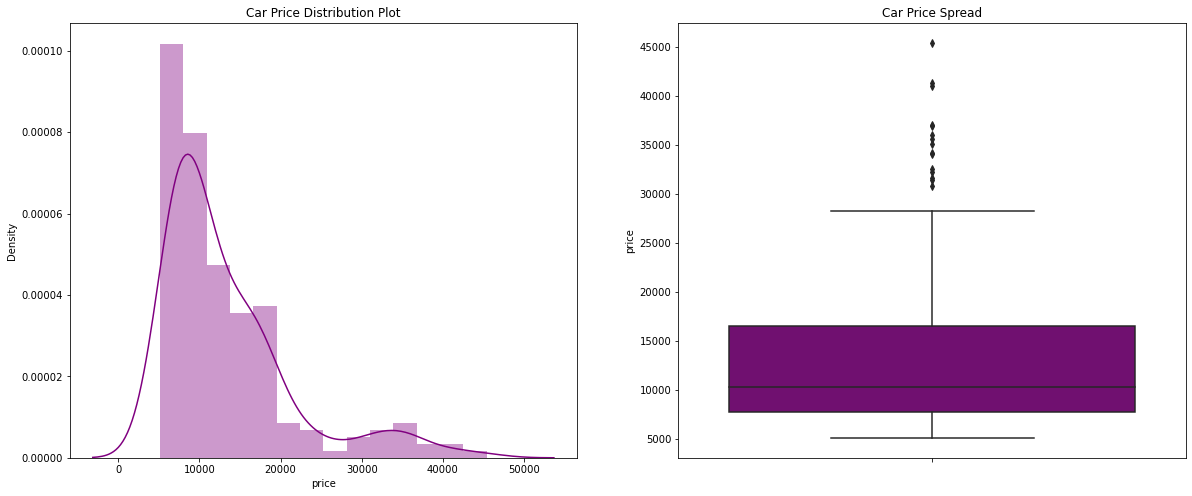

In [594]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(df_car.price, color='purple')

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df_car.price, color= 'purple')

plt.show()

Based on the plot's apparent right skew, the majority of the dataset's prices are modest (below 15 000).
The pricing distribution's mean and median diverge significantly from one another.
There is a significant variance in the car pricing, as evidenced by the data points' wide dispersion from the mean.(15%) of the prices are between 18,500 and 45,400, while the remaining 85% are below 18,500.

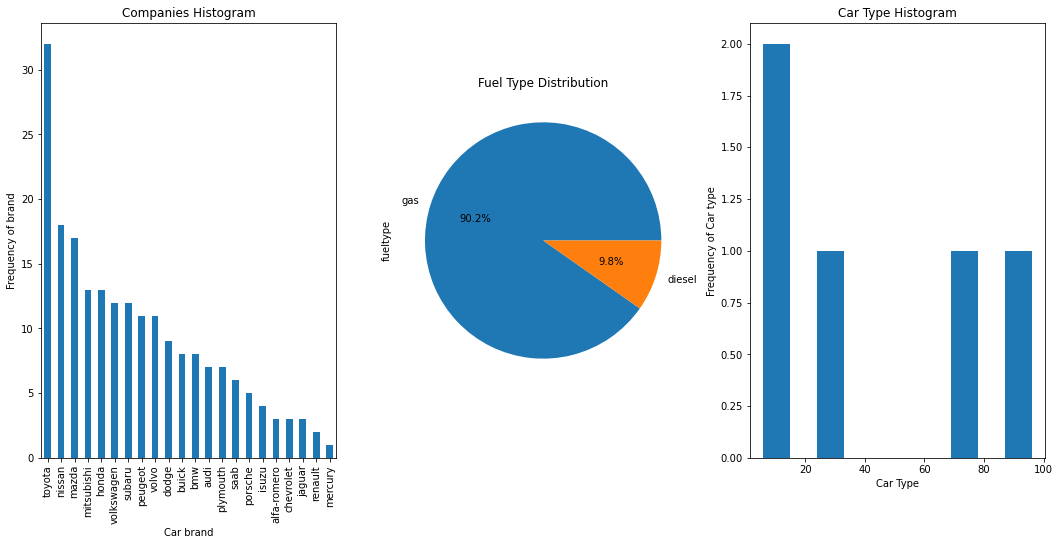

In [595]:
# Define the figure size
plt.figure(figsize=(18, 8))

# First subplot - Bar chart
plt.subplot(1, 3, 1)
plt1 = df_car.CarBrand.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel='Car brand', ylabel='Frequency of brand')

# Second subplot - Pie chart
plt.subplot(1, 3, 2)
plt2 = df_car.fueltype.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Fuel Type Distribution')

# Third subplot - Other type of visual
plt.subplot(1, 3, 3)
plt3 = df_car.carbody.value_counts().plot(kind='hist')
plt.title('Car Type Histogram')
plt3.set(xlabel='Car Type', ylabel='Frequency of Car type')

# Show the plot
plt.show()

- Toyota seemed to be favored car company.
- Number of gas fueled cars are more than diesel.
- sedan is the top car type prefered.

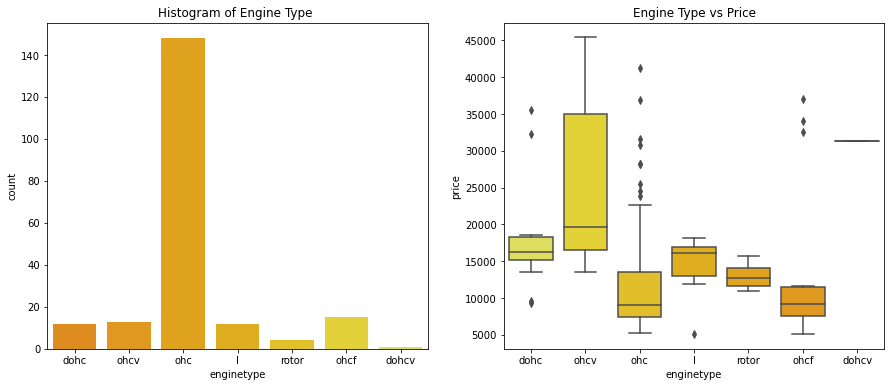

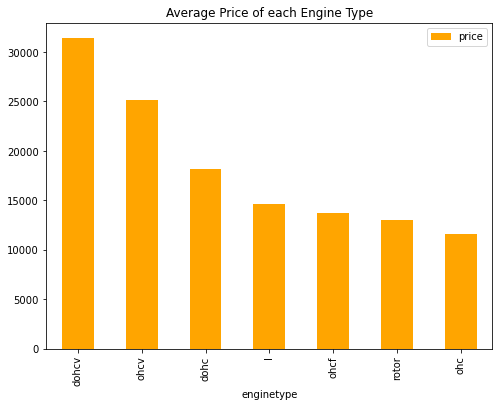

In [596]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Subplot 1 - Histogram of Engine_Type
plt.subplot(1, 2, 1)
plt.title('Histogram of Engine Type ')
sns.countplot(df_car.enginetype, palette='Wistia_r')

# Subplot 2 - Engine Type vs Total Price
plt.subplot(1, 2, 2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df_car.enginetype, y=df_car.price, palette='Wistia')

# Show the plot
plt.show()

# DataFrame for average price by engine type
df = pd.DataFrame(df_car.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))

# Plotting the average price of each engine type
df.plot(kind='bar', figsize=(8, 6), color='orange')
plt.title('Average Price of each Engine Type')
plt.show()

- ohc Engine type seems to be most favored type.
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

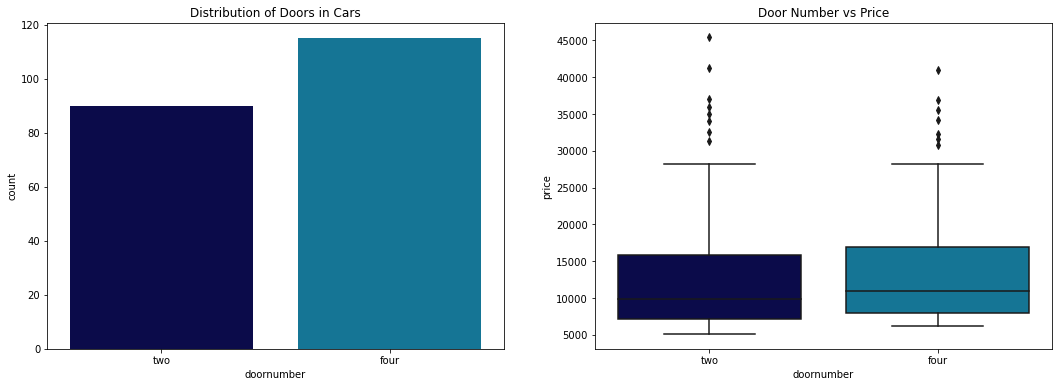

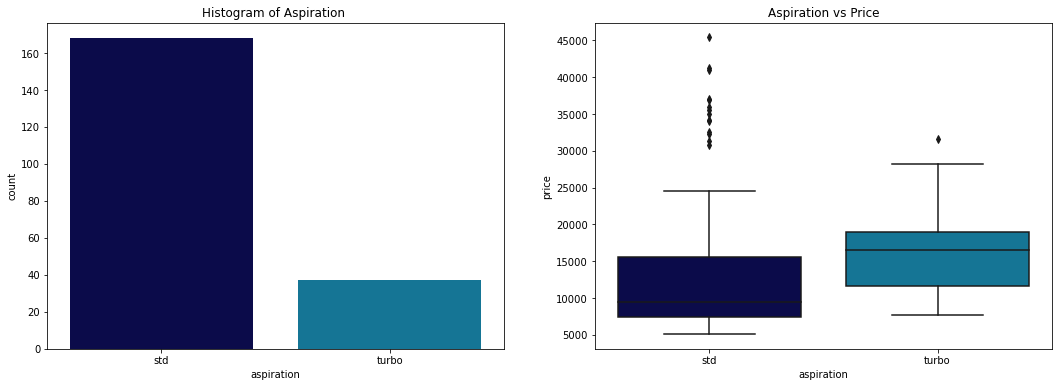

In [597]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title('Distribution of Doors in Cars')
sns.countplot(df_car.doornumber, palette=("ocean"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df_car.doornumber, y=df_car.price, palette=("ocean"))

plt.show()

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.title('Histogram of Aspiration ')
sns.countplot(df_car.aspiration, palette=("ocean"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df_car.aspiration, y=df_car.price, palette=("ocean"))

plt.show()

- The door number variable has little effect on the cost. The categories inside it do not significantly differ from one another.
- Aspiration with turbo  has some high values outside of the whiskers however it appears that it has a higher price range than the standard.

<Figure size 1440x576 with 0 Axes>

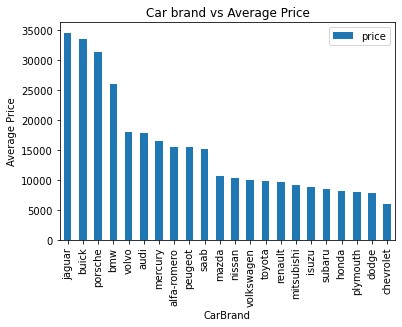

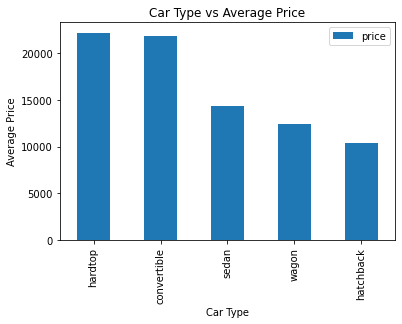

In [598]:
# Set the figure size
plt.figure(figsize=(20, 8))

# DataFrame for average price by company name
df = pd.DataFrame(df_car.groupby(['CarBrand'])['price'].mean().sort_values(ascending=False))

# Plot average price by company name
df.plot(kind='bar')
plt.title('Car brand vs Average Price')
plt.xlabel('CarBrand')
plt.ylabel('Average Price')
plt.show()


# DataFrame for average price by car type
df = pd.DataFrame(df_car.groupby(['carbody'])['price'].mean().sort_values(ascending=False))

# Plot average price by car type
df.plot(kind='bar')
plt.title('Car Type vs Average Price')
plt.xlabel('Car Type')
plt.ylabel('Average Price')
plt.show()




- Jaguar and Buick seem to have highest average price.
- hardtop and convertible have higher average price.

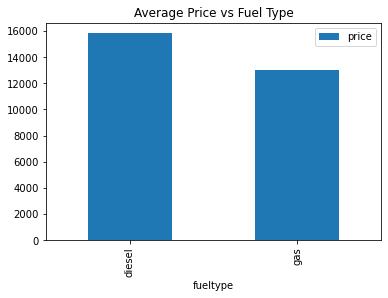

In [599]:
df = pd.DataFrame(df_car.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Average Price vs Fuel Type')
plt.show()


- diesel has higher average price than gas.

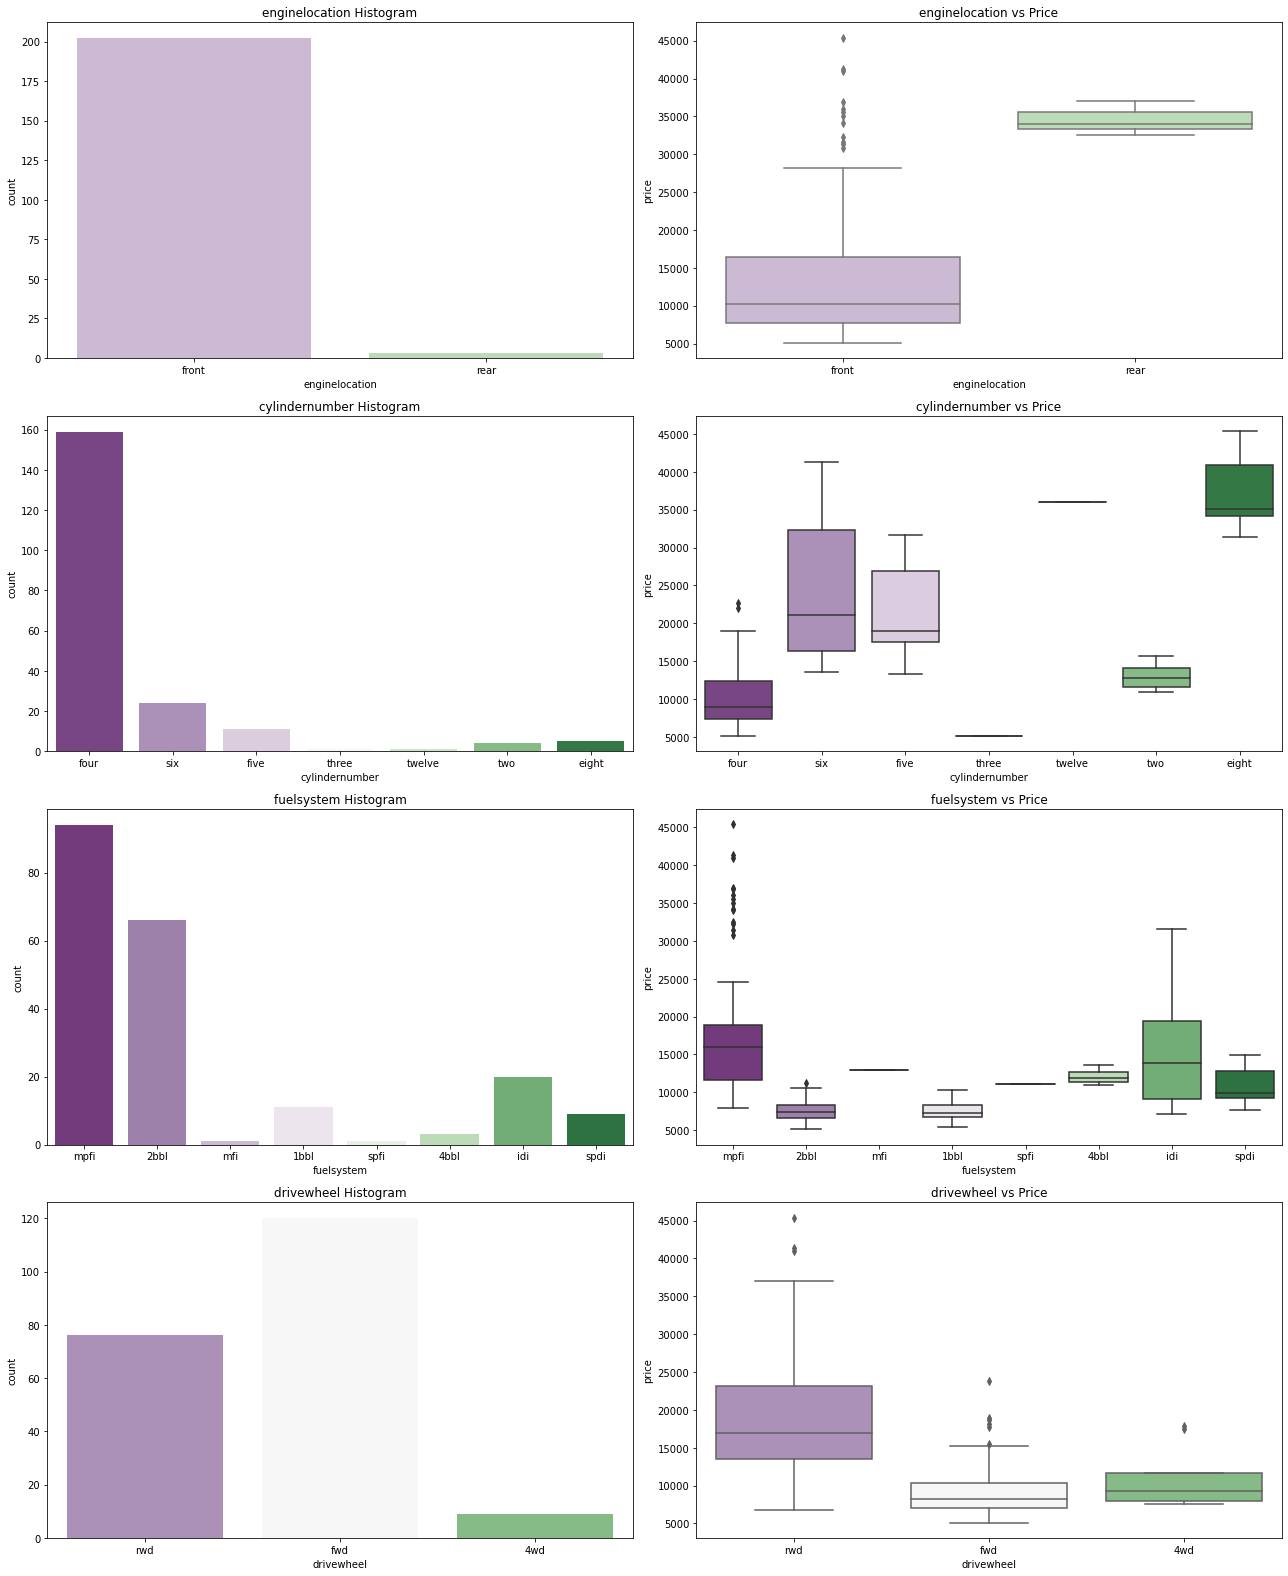

In [600]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(df_car[x],palette=("PRGn"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=df_car[x], y=df_car.price, palette=("PRGn"))
    
plt.figure(figsize=(18,22))

plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)

plt.tight_layout()

- There are not enough datapoints for enginelocation categories to draw conclusions.
- Four, six, and five cylinders are the most prevalent numbers. Even so, the pricing range for eight cylinders is the highest.
- The two most popular types of fuel systems are mpfi and 2bbl. With the highest pricing range, mpfi and idi. However, there isn't enough information for other categories to draw any significant conclusions.
a notable distinction in the drivewheel class. 
- The majority of expensive cars appear to favor rear-wheel drive.

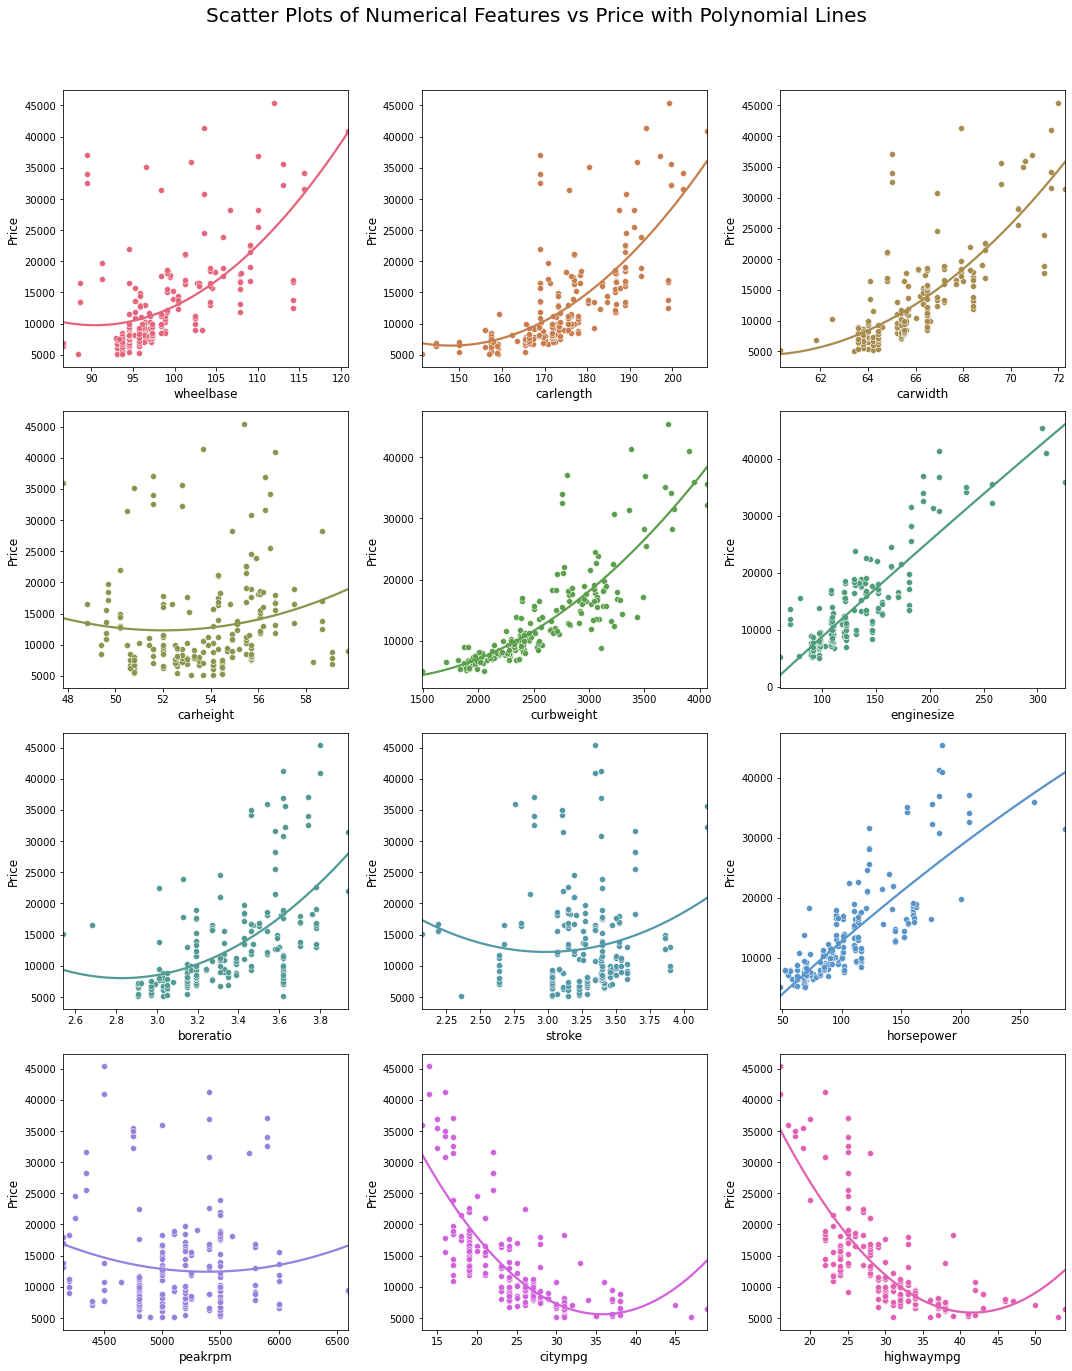

In [601]:
numerical_cols = df_car.select_dtypes(include=['float64', 'int64']).columns

selected_cols = [col for col in numerical_cols if col not in ['price', 'car_ID', 'symboling', 'compressionratio']]

num_subplots = len(selected_cols)
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(3, num_subplots)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), facecolor='white')
fig.suptitle("Scatter Plots of Numerical Features vs Price with Polynomial Lines", size=20)

palette = sns.husl_palette(n_colors=len(selected_cols), s=0.7, l=0.6)

for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx < num_subplots:
            sns.scatterplot(x=selected_cols[idx], y='price', data=df_car, ax=axes[i, j], color=palette[idx])

            sns.regplot(x=selected_cols[idx], y='price', data=df_car, ax=axes[i, j], scatter=False, order=2, color=palette[idx], ci=None)

            axes[i, j].set_xlabel(selected_cols[idx], fontsize=12)
            axes[i, j].set_ylabel("Price", fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Curbweight, carlength, and carwidth appear to positively correlate with price.
- Carheight doesn't exhibit any discernible price trends.
- Price and engine size, boreratio, horsepower, and wheelbase appear to be significantly positively correlated.
- There appears to be a strong negative association between price and city/highway mpg.

### Creating New Features



In [602]:
#Fuel economy
df_car['fuel_economy'] = (0.55 * df_car['citympg']) + (0.45 * df_car['highwaympg'])

In [603]:
#Binning the Car Companies based on avg prices of each Company.
df_car['price'] = df_car['price'].astype('int')
temp = df_car.copy()
table = temp.groupby(['CarBrand'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CarBrand')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df_car['cars_price_range'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
df_car.head()

,car_ID,symboling,CarBrand,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel_economy,cars_price_range
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


# MODELLING

I employed Ordinary Least Squares (OLS) regression to fit the model, aiming to predict car prices based on selected features. The model's performance was evaluated using various statistical metrics, including R-squared and adjusted R-squared values. These metrics provide insights into the proportion of variance in car prices explained by the model.

Removing unnecessary column

In [604]:
del df_car["car_ID"] # Unneccessary for modelling

Based on our EDA the significant variables following visual analysis are listed as follows:
 
- engine type 
- fuel type 
- body style 
- aspiration 
- drivewheel 
- cylinder number 
- curbweight 
- car length 
- car width 
- and engine size 
- The Boreratio 
- Horsepower


In [605]:
#sort the dataset with the necessary features only.
cars = df_car[['price', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
               'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 
               'carlength', 'carwidth', 'fuel_economy', 'cars_price_range']]


Encoding the categorical Features

In [606]:
# Defining the map function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars = dummies('fueltype',cars)
cars = dummies('aspiration',cars)
cars = dummies('carbody',cars)
cars = dummies('drivewheel',cars)
cars = dummies('enginetype',cars)
cars = dummies('cylindernumber',cars)
cars = dummies('cars_price_range',cars)


In [607]:
cars.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,fuel_economy,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,168.8,64.1,23.70,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,168.8,64.1,23.70,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,171.2,65.5,22.15,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,176.6,66.2,26.70,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,176.6,66.4,19.80,1,...,0,0,1,0,0,0,0,0,1,0


In [608]:
cars.shape

(205, 31)

Splitting the dataframe in 70:30 ratio

In [609]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [612]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price','fuel_economy']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

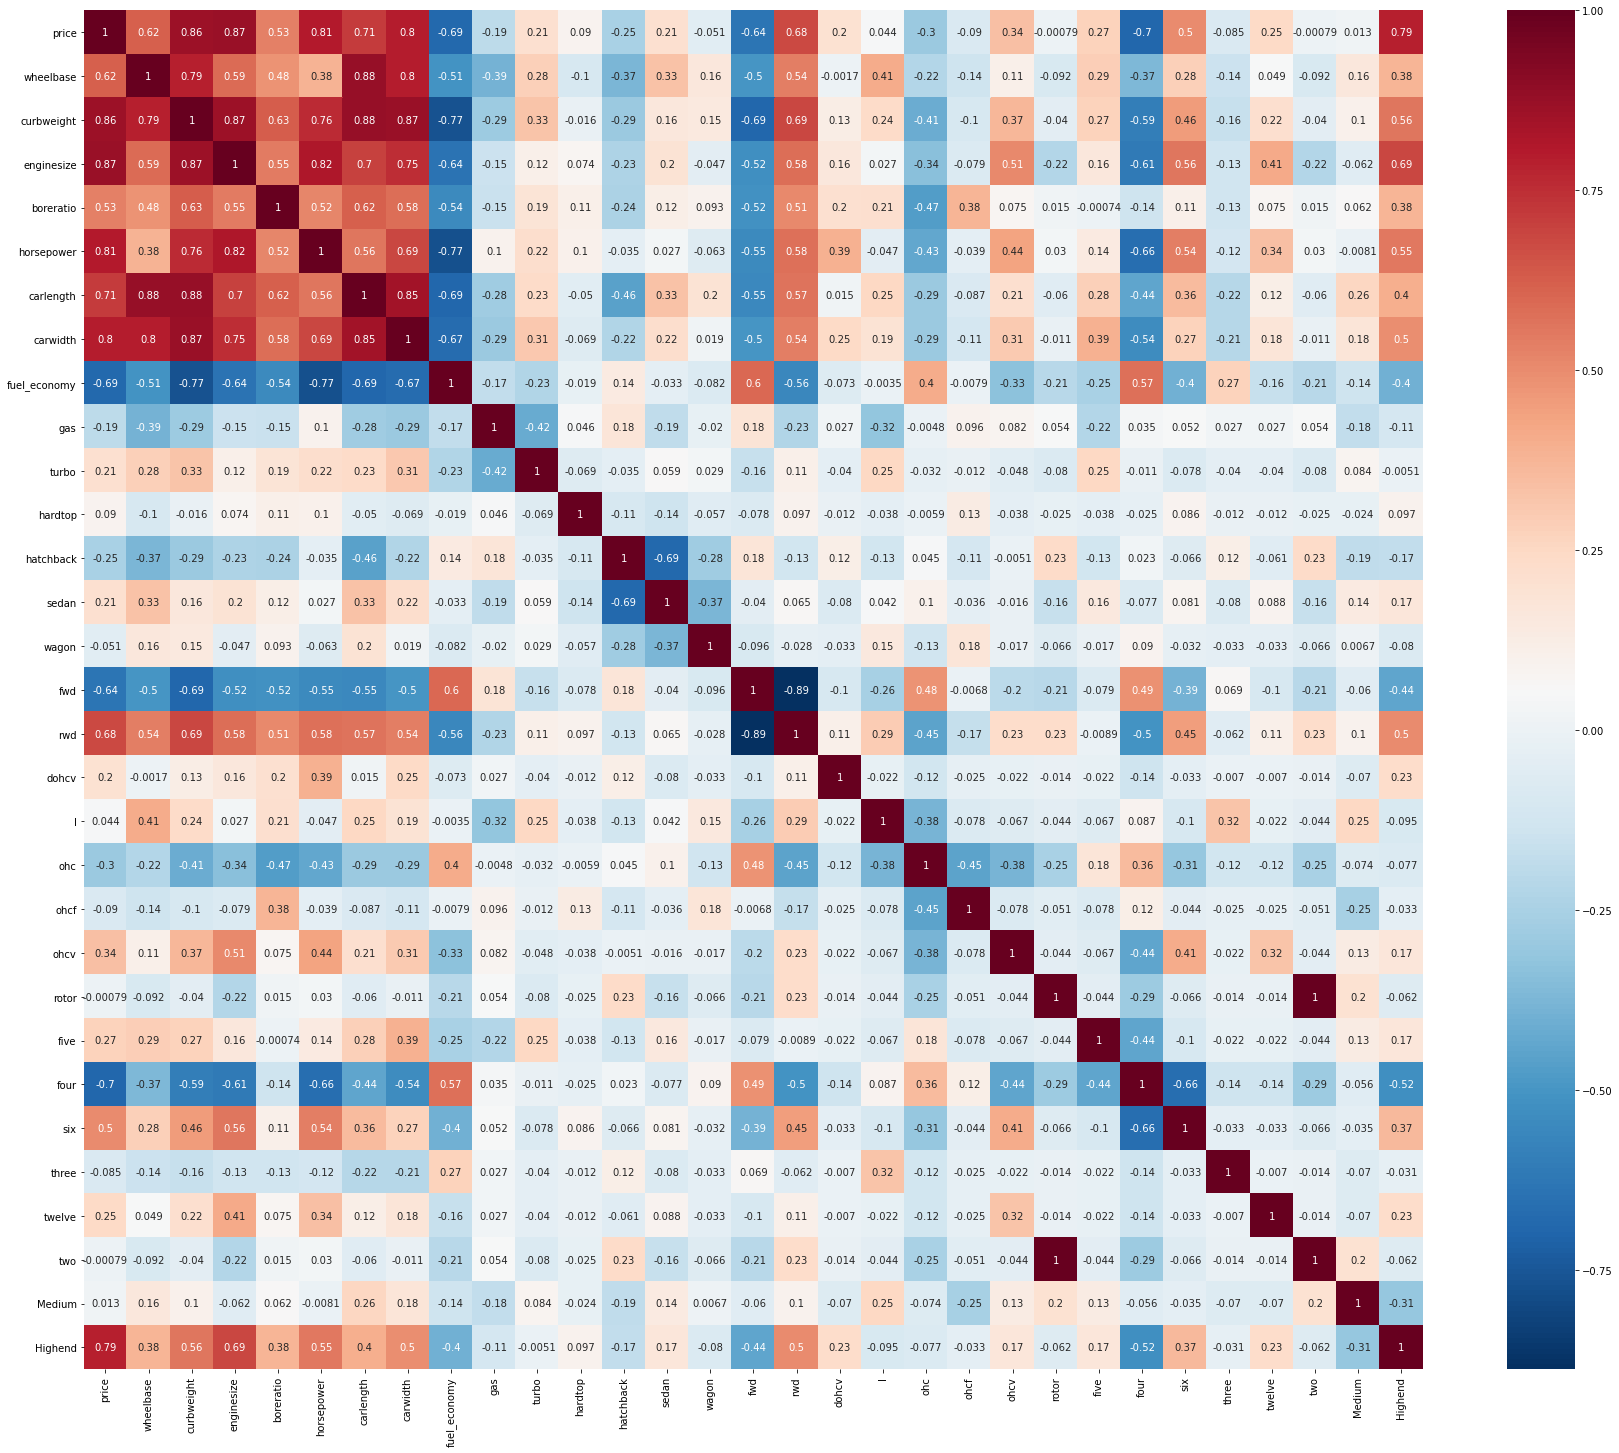

In [615]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu_r")
plt.show()

- Engine size, curbweight, horsepower, city/highway mpg, and curbweight have the strongest pricing correlations.

- The price dramatically drops as fuel consumption metrics (mpg, or miles per gallon) for cities and highways rise.

- Price increases correspond with improvements in horsepower, engine size, curb weight, width, and length of the vehicle.

- Price is unaffected by symboling, stroke, compression ratio, and eakrpm.

#### We can use the VIF measure to solve this problem. The multicollinearity between independent variables is measured by VIF. 

In [616]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

RFE is a feature selection technique that recursively removes features and builds a model on those features that remain. In this case, RFE(lm, 10) specifies that RFE should select the top 10 features. After fitting RFE to the training data, it selects the best features based on their importance for predicting car prices.

In [617]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [618]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

#### Listing Important Features

In [619]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('fuel_economy', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 20),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 21),
 ('Medium', False, 12),
 ('Highend', True, 1)]

Features marked as True in the rfe.support_ array are selected, while False indicates they are not selected. The rfe.ranking_ array ranks the features based on their importance.

## Building the Model using Selected Features:

Here, a new DataFrame X_train_rfe is created, containing only the features selected by RFE.

In [620]:

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,horsepower,carwidth,fuel_economy,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.291667,0.530864,0,1,0,0,0,0
125,0.500388,0.395833,0.666667,0.213992,1,0,0,0,0,1
166,0.314973,0.266667,0.308333,0.344307,1,0,0,0,0,0
1,0.411171,0.262500,0.316667,0.244170,0,0,0,0,0,0
199,0.647401,0.475000,0.575000,0.122085,0,0,1,0,0,0


## Building the Model using Statsmodels and Checking for Multicollinearity:

This function calculates the Variance Inflation Factor (VIF) for each feature to check for multicollinearity, which is a condition where two or more predictors in a multiple regression model are highly correlated.

The literature states that this procedure is repeated until the VIF falls below 10.

In [621]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)


### MODEL 1

In [622]:
X_train_new = build_model(X_train_rfe,y_train)



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.29e-70
Time:                        11:31:36   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0947      0.042     -2.243   

The predictor variable "twelve" has a p-value of 0.7, which is greater than 0.05. This suggests that "twelve" may not be statistically significant in predicting car prices at the conventional significance level of 0.05.
Therefore, based on the provided information, "twelve" has a relatively high p-value compared to the other variables in the model, indicating lower statistical significance in predicting car prices.

In [623]:
X_train_new = X_train_rfe.drop(["twelve"], axis = 1)

### Model 2

In [624]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.25e-71
Time:                        11:32:54   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0764      0.041     -1.851   

Based on the provided output:

The variable "const" has a high p-value (0.494), indicating lower statistical significance. However, this variable represents the intercept term and is often included in regression models.

In [625]:
checkVIF(X_train_new)

,Features,VIF
0,const,67.23
1,curbweight,8.33
6,sedan,6.13
5,hatchback,5.67
3,carwidth,5.19
2,horsepower,5.06
7,wagon,3.58
4,fuel_economy,3.56
9,Highend,1.68
8,dohcv,1.62


Dropping fuel_economy because of high p value value.

In [626]:
X_train_new = X_train_new.drop(["fuel_economy"], axis = 1)


### MODEL 3


In [627]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           7.85e-72
Time:                        11:33:49   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

Based on the Variance Inflation Factor (VIF) values, which measure the multicollinearity between predictor variables, the "const" variable has a very high VIF of 26.90, indicating high multicollinearity. Since "const" typically represents the intercept term added in regression models, it's not a predictor variable but rather a constant term. 

After removing "const," the next variable with a relatively high VIF is "curbweight" with a VIF of 8.10. While a VIF of 8.10 is not extremely high, it indicates some level of multicollinearity. 

In [628]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


Considering curbweight high Variance Inflation Factor (VIF), indicating multicollinearity, we will remove the 'curbweight' variable from the model.

In [630]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

### MODEL 4

In [631]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           4.70e-70
Time:                        11:37:25   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [632]:
checkVIF(X_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


Removing Sedan because of High VIF

In [633]:
X_train_new = X_train_new.drop(["sedan"], axis = 1)

### Model 5

In [634]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.68e-69
Time:                        11:38:23   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

Checking VIF

In [635]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


Removing Wagon since its p value is higher than 0.05

In [636]:
X_train_new = X_train_new.drop(["wagon"], axis = 1)

### MODEL 6

In [637]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.57e-70
Time:                        11:44:56   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [638]:
checkVIF(X_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


In [639]:
#Step 9 : Residual Analysis of Model
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

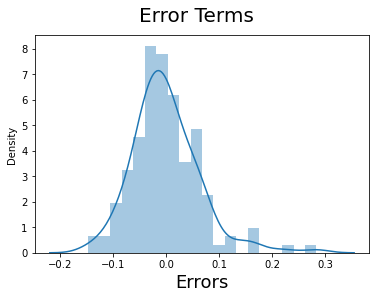

In [640]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

Since the error terms appear to be roughly regularly distributed, the linear modeling assumption appears to be met.

In [641]:
#Scaling the test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [642]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

In [643]:
# Now using our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [644]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [645]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.8146387226353742

Text(0, 0.5, 'y_pred')

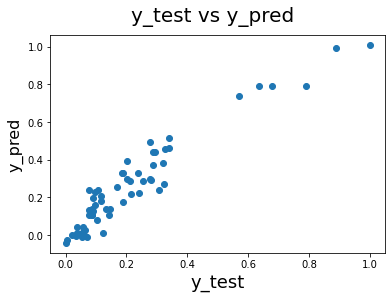

In [646]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [647]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 21 Apr 2024   Prob (F-statistic):           1.57e-70
Time:                        11:45:47   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0


## Evaluation

- The final results of the model indicate that it explains approximately 91.2% of the variance in car prices, as indicated by the R-squared value of 0.912. This suggests that the model provides a good fit to the data and effectively captures the relationships between the independent variables and the dependent variable (car prices).

- The adjusted R-squared value of 0.909 further supports the model's goodness of fit, accounting for the number of predictors in the model.

- The F-statistic of 284.8 with a very low associated p-value (< 0.001) suggests that the overall model is statistically significant, indicating that at least one of the independent variables has a significant effect on car prices.

- Examining the coefficients of the individual predictors, we observe that all predictors except 'hatchback' have statistically significant coefficients at the 0.05 significance level. Specifically:

- 'horsepower', 'carwidth', 'dohcv', and 'Highend' variables all have positive coefficients, indicating that an increase in these variables is associated with higher car prices.
Conversely, the 'hatchback' variable has a negative coefficient, suggesting that the presence of a hatchback body style is associated with lower car prices.
The 'const' coefficient represents the intercept of the model and indicates the baseline car price when all other predictors are zero.

- The standard errors, t-values, and p-values associated with each coefficient provide information about the precision of the estimated coefficients and whether they are statistically different from zero.

- Overall, the model appears to be robust, explaining a substantial portion of the variance in car prices and demonstrating the importance of horsepower, car width, engine type (dohcv), and high-end features in influencing car prices in the given dataset.

## Conclusion

In conclusion, the predictive analytics report provides Geely Auto with crucial insights into the factors influencing car prices in the US market. Through thorough data analysis and model building, key variables such as horsepower, car width, and the presence of high-end features were identified as significant drivers of car prices. The developed linear regression model demonstrated a high level of accuracy, explaining approximately 91.2% of the variance in car prices. This suggests that the model can reliably predict car prices and guide Geely Auto's pricing strategy effectively.

Moving forward, Geely Auto can leverage these insights to optimize pricing strategies, refine product offerings, and tailor marketing efforts to target specific market segments. By focusing on enhancing horsepower, car width, and the inclusion of high-end features in their vehicle lineup, Geely Auto can maintain a competitive edge in the US automotive market. Additionally, continuous monitoring of market trends and incorporation of additional data sources will enable Geely Auto to adapt swiftly to changing consumer preferences and industry dynamics, ensuring sustained success and brand growth in the highly competitive automotive landscape.

To answer the questions:

1. **What were the three most significant variables?**
   From the model summary, we can see that the three most significant variables are:
   - Horsepower
   - Carwidth
   - Highend

2. **Of those three, which had the greatest positive influence on car prices?**
   Among the three most significant variables, 'Highend' had the greatest positive influence on car prices. This is evident from its coefficient of 0.2833, which indicates that an increase in the presence of high-end features leads to a corresponding increase in car prices.

3. **How accurate was the model?**
   The model's accuracy can be assessed by its R-squared value, which is 0.912. This indicates that approximately 91.2% of the variance in car prices is explained by the model. Additionally, the adjusted R-squared value of 0.909 suggests that the model's goodness of fit is still high, considering the number of predictors. Furthermore, the F-statistic of 284.8 with a very low associated p-value (< 0.001) indicates that the overall model is statistically significant. Therefore, based on these metrics, we can conclude that the model is reasonably accurate in predicting car prices.

### References

- Raschka, S., & Mirjalili, V. (2019). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2. Packt Publishing.

- Géron, A. (2019). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.
- Mali, K. (2024, January 23). Everything you need to Know about Linear Regression! Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
- Qualtrics. (n.d.). https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/interpreting-residual-plots-improve-regression/